In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../../../data/raw/nb_data/6. Nan_removed/gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,vatika gurgaon,sector 83,1.05,7000.0,3,3,3,3.0,Relatively New,1618.0,0,0,1,0,0,2,79
1,flat,m3m the marina,sector 68,1.45,9615.0,3,2,3+,9.0,New Property,1365.0,0,0,0,0,0,2,0
2,house,bptp astaire gardens,sector 70a,1.18,8138.0,3,3,3+,2.0,Relatively New,1611.0,0,0,0,0,1,1,153
3,flat,cghs airport apartment,sector 47,1.65,7857.0,3,3,3,1.0,Old Property,1906.0,0,0,0,0,1,1,136
4,flat,m3m woodshire,sector 107,1.65,5961.0,4,5,3+,12.0,Relatively New,2505.0,0,1,0,0,0,2,21


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 83,1.05,3,3,3,3.0,Relatively New,1618.0,0,0,1,0,0,2,79
1,flat,sector 68,1.45,3,2,3+,9.0,New Property,1365.0,0,0,0,0,0,2,0
2,house,sector 70a,1.18,3,3,3+,2.0,Relatively New,1611.0,0,0,0,0,1,1,153
3,flat,sector 47,1.65,3,3,3,1.0,Old Property,1906.0,0,0,0,0,1,1,136
4,flat,sector 107,1.65,4,5,3+,12.0,Relatively New,2505.0,0,1,0,0,0,2,21


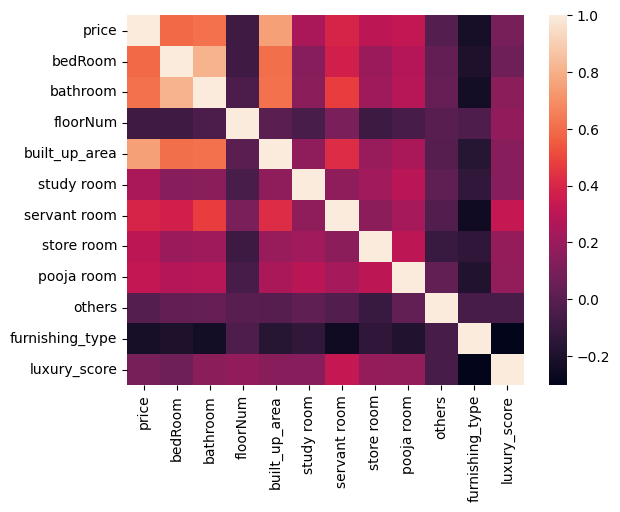

In [9]:
sns.heatmap(train_df.corr(numeric_only=True))
plt.show()

In [11]:
train_df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.748574
bathroom           0.609777
bedRoom            0.591289
servant room       0.391930
pooja room         0.319852
store room         0.305677
study room         0.242955
luxury_score       0.091473
others            -0.013064
floorNum          -0.087442
furnishing_type   -0.222280
Name: price, dtype: float64

In [13]:
# cols in question

# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession